# 債務不履行リスクの低減
[SIGNATEコンペ](https://signate.jp/competitions/294)

***
<br>

___内容説明___

借入総額や返済期間、金利、借入目的などの顧客データを使って、債務不履行リスクを予測するモデルを構築していただきます。


金融会社では個人や法人にお金を貸す、いわゆる融資を行い、返済額に利子を上乗せすることで利益を得ています。
しかし、様々な理由から貸したのに返済されない、貸し倒れというケースが発生します。貸し倒れは金融会社として大きな損失であるため、できる限り避けたいですが、
一定確率で貸し倒れが起きることは避けられないのが現状です。したがって金融会社は、貸し倒れのリスクを可能な限り減らしたり、貸し倒れても利益がでるように適切に金利を設定したりしたいと考えています。
そこで今回は、借入総額や返済期間、金利、借入目的などの顧客データを使って、債務不履行リスクを予測するモデルの構築にチャレンジしてみましょう。

<br>
  
***

<br>

___データ概要___

課題種別：分類

データ種別：多変量

学習データサンプル数：242156

説明変数の数：9

欠損値：無

目的変数について：ChargedOffを1、FullyPaidを0として予測する必要があります。

<br>

***

<br>

___評価方法___

- 精度評価は、評価関数「F1Score」を使用します。

- 評価値は0～1の値をとり、精度が高いほど大きな値となります。

- F1Scoreとは

||予測値の負の事例|予測値の正の事例|
| :---: | :---: | :---: |
| 真の値の負の事例 | True Negative(TN) | False Positive(FP) |
| 真の値の正の事例 | False Negative(FN) | True Positive(TP) |

```math
Accuracy = (TP+TN) / (TN+FP+FN+TP)
Precision = TP/ (TP+FP)
Recall = TP / (TP+FN)
F1Score = 2 / (1/Precision) + (1/Recall)
```



## 事前準備
SIGNATEからダウンロードした__train.csv__と__test.csv__ファイルをセッションストレージにアップロードしておく

Google Colabの左のファイルタグの左のアイコンからローカルファイルを選択することで可能

## ライブラリのインポート

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
import warnings
# from sklearn.preprocessing import LabelEncoder

warnings.simplefilter('ignore')

## 学習データの確認

#### データの読み込み

In [12]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

#### データの中身の確認

In [13]:
train.shape

(242156, 10)

In [14]:
test.shape

(26906, 9)

In [15]:
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,88194295,1800.0,3 years,14.49,C4,NaN,debt_consolidation,665.0,Individual,FullyPaid
1,5146039,1200.0,5 years,16.29,C4,2 years,debt_consolidation,700.0,Individual,ChargedOff
2,3095896,2000.0,5 years,21.98,E4,10 years,home_improvement,670.0,Individual,FullyPaid
3,88625044,1000.0,3 years,8.59,A5,4 years,debt_consolidation,710.0,Individual,FullyPaid
4,1178189,1500.0,3 years,13.99,C1,4 years,debt_consolidation,680.0,Individual,FullyPaid


In [16]:
test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,1496754,1912.5,3 years,10.16,B1,5 years,debt_consolidation,725.0,Individual
1,84909594,1800.0,3 years,8.99,B1,9 years,credit_card,695.0,Individual
2,1165403,550.0,3 years,14.65,C2,10 years,credit_card,660.0,Individual
3,91354446,2000.0,5 years,15.59,C5,10 years,credit_card,695.0,Individual
4,85636932,1500.0,5 years,12.79,C1,0 years,medical,720.0,Individual


In [17]:
len(train[train['loan_status'] == 'FullyPaid'])

193815

In [18]:
len(train[train['loan_status'] == 'ChargedOff'])

48341

#### データの図示化

(array([ 9586., 16485., 26273., 23431., 31088., 21678., 11762., 22726.,
        12180., 17338.,  7672.,  8542.,  7594.,  4873.,  6815.,  2135.,
         1332.,  8607.,   159.,  1880.]),
 array([ 100.,  295.,  490.,  685.,  880., 1075., 1270., 1465., 1660.,
        1855., 2050., 2245., 2440., 2635., 2830., 3025., 3220., 3415.,
        3610., 3805., 4000.]),
 <a list of 20 Patch objects>)

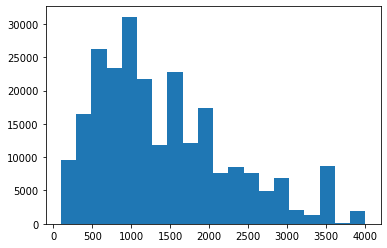

In [62]:
plt.hist(x=train['loan_amnt'], bins=20)

(array([ 6487., 13520., 20797., 14210., 33327., 21733., 30739., 20266.,
        18414., 18698., 12720.,  7569.,  7376.,  4597.,  3615.,  3975.,
         1462.,   632.,   855.,  1164.]),
 array([ 5.32  ,  6.6035,  7.887 ,  9.1705, 10.454 , 11.7375, 13.021 ,
        14.3045, 15.588 , 16.8715, 18.155 , 19.4385, 20.722 , 22.0055,
        23.289 , 24.5725, 25.856 , 27.1395, 28.423 , 29.7065, 30.99  ]),
 <a list of 20 Patch objects>)

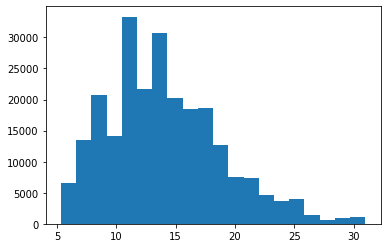

In [61]:
plt.hist(x=train['interest_rate'], bins=20)

(array([38001., 38477., 35629., 31472., 26612., 20334.,  8230., 12013.,
         8308.,  6079.,  4564.,  3528.,  2837.,  1097.,  1934.,  1396.,
          828.,   498.,   234.,    85.]),
 array([660.  , 669.25, 678.5 , 687.75, 697.  , 706.25, 715.5 , 724.75,
        734.  , 743.25, 752.5 , 761.75, 771.  , 780.25, 789.5 , 798.75,
        808.  , 817.25, 826.5 , 835.75, 845.  ]),
 <a list of 20 Patch objects>)

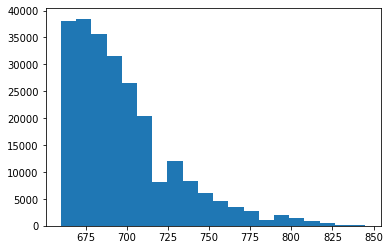

In [60]:
plt.hist(x=train['credit_score'], bins=20)

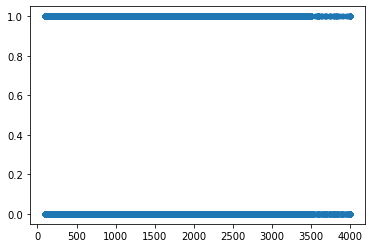

In [55]:
plt.scatter(train['loan_amnt'], train['loan_status'], s=20, c=None, marker='o')

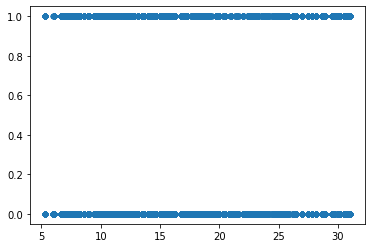

In [56]:
plt.scatter(train['interest_rate'], train['loan_status'], s=20, c=None, marker='o')

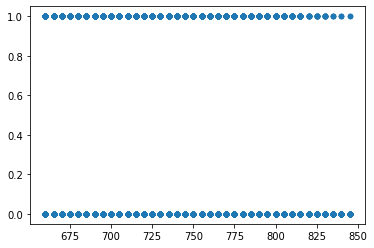

In [57]:
plt.scatter(train['credit_score'], train['loan_status'], s=20, c=None, marker='o')

## 学習準備

#### データの整形（前処理）

In [19]:
# train.replace({'Individual': 0, 'Joint App': 1}, inplace=True)
train.replace({'FullyPaid': 0, 'ChargedOff': 1}, inplace=True)

# test.replace({'Individual': 0, 'Joint App': 1}, inplace=True)

train.drop(columns=['term', 'grade', 'employment_length', 'purpose', 'application_type'], inplace=True)
test.drop(columns=['term', 'grade', 'employment_length', 'purpose', 'application_type'], inplace=True)

#### Data Validation

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train, train['loan_status'], test_size=0.3, random_state=0, stratify=train['loan_status'])

#### Validationしたデータの確認

In [21]:
X_train.shape

(169509, 5)

In [22]:
X_train.head()

,id,loan_amnt,interest_rate,credit_score,loan_status
52712,5786159,2437.5,22.95,665.0,1
213103,2371000,2917.5,17.27,680.0,1
180618,1202248,3235.0,12.12,725.0,0
148232,84700735,450.0,10.99,665.0,0
105475,122985525,1680.0,15.05,660.0,0


In [23]:
X_valid.shape

(72647, 5)

In [24]:
X_valid.head()

,id,loan_amnt,interest_rate,credit_score,loan_status
80469,1302409,1000.0,12.12,705.0,1
96031,2076083,1500.0,16.29,685.0,0
189115,2864747,750.0,12.12,680.0,0
185327,85515436,1600.0,23.99,670.0,1
117158,4894665,2100.0,6.62,715.0,0


In [25]:
y_train.shape

(169509,)

In [26]:
y_train.head()

52712     1
213103    1
180618    0
148232    0
105475    0
Name: loan_status, dtype: int64

In [27]:
y_valid.shape

(72647,)

In [28]:
y_valid.head()

80469     1
96031     0
189115    0
185327    1
117158    0
Name: loan_status, dtype: int64

#### 目的変数の削除

In [29]:
X_train.drop(columns='loan_status', inplace=True)
X_valid.drop(columns='loan_status', inplace=True)

#### 説明変数の設定

In [30]:
categorical_feature = ['loan_amnt', 'interest_rate', 'credit_score']

## モデルの作成/学習

In [31]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

# 5-fold CVモデルの学習
# 5つのモデルを保存するリストの初期化
models = []
pred_ave = []
first_judge = True
num_fold = 6

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=num_fold, shuffle=True,  random_state=42)

# KFoldクラスで分割した回数だけ実行（ここでは5回）
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]
    
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            categorical_feature=categorical_feature)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           categorical_feature=categorical_feature)
    
    # パラメータを設定
    params = {'objective': 'binary',
              'metric': 'binary_error',
#               'learning_rate':0.1,
#               'num_iterations':100,
#               'num_leaves':31,
#               'max_depth':-1
#               'weight_columns':[0.07495,0.110919,0.065571,0.067531,0.05158,
#                                0.10085,0.053923,0.147468,0.065578,0.060578,
#                                0.10546,0.095594]
             }
    
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model = lgb.train(params,                                   # 上記で設定したパラメータ
                      lgb_train,                                # 使用するデータセット
                      num_boost_round=1000,                     # 学習の回数
                      valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                      categorical_feature=categorical_feature, # カテゴリー変数を設定
                      early_stopping_rounds=100,                 # アーリーストッピング# 学習
                      verbose_eval=10)                          # 学習の経過の非表示
    
    # テストデータで予測する
    y_pred = model.predict(test, num_iteration=model.best_iteration)

    if first_judge:
        pred_ave = y_pred
        first_judge = False
    else:
        pred_ave = pred_ave + y_pred
    
    # 学習が終わったモデルをリストに入れておく
    models.append(model) 

pred_ave = pred_ave/num_fold

Training until validation scores don't improve for 100 rounds.
[10]	training's binary_error: 0.199629	valid_1's binary_error: 0.199632
[20]	training's binary_error: 0.198687	valid_1's binary_error: 0.199632
[30]	training's binary_error: 0.195289	valid_1's binary_error: 0.199844
[40]	training's binary_error: 0.194291	valid_1's binary_error: 0.200729
[50]	training's binary_error: 0.193555	valid_1's binary_error: 0.20126
[60]	training's binary_error: 0.192748	valid_1's binary_error: 0.201579
[70]	training's binary_error: 0.192153	valid_1's binary_error: 0.201897
[80]	training's binary_error: 0.191254	valid_1's binary_error: 0.202003
[90]	training's binary_error: 0.190787	valid_1's binary_error: 0.202251
[100]	training's binary_error: 0.190327	valid_1's binary_error: 0.202711
[110]	training's binary_error: 0.189923	valid_1's binary_error: 0.203101
[120]	training's binary_error: 0.189385	valid_1's binary_error: 0.203101
Early stopping, best iteration is:
[21]	training's binary_error: 0.1981

In [34]:
pred_ave[:5]

array([0.1062986 , 0.1604032 , 0.19959522, 0.30758049, 0.21458871])

#### trainデータの各modelの出力の平均

In [32]:
first_judge = True

for model in models:
    x_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    if first_judge:
        x_pred_ave = x_pred
        first_judge = False
    else:
        x_pred_ave = x_pred_ave + x_pred
        
x_pred_ave = x_pred_ave/num_fold

In [37]:
x_pred_ave[:5]

array([0.16057979, 0.19509748, 0.09376267, 0.50395649, 0.05493104])

## 学習結果の表示

#### trainデータのF1Score

In [40]:
y_valid.head()

80469     1
96031     0
189115    0
185327    1
117158    0
Name: loan_status, dtype: int64

In [41]:
y_test = y_valid.values

In [42]:
y_test[:5]

array([1, 0, 0, 1, 0])

In [45]:
x_pred_ave[:5]

array([0.16057979, 0.19509748, 0.09376267, 0.50395649, 0.05493104])

In [43]:
X_pred = (x_pred_ave > 0.18).astype(int)

In [46]:
X_pred[:5]

array([0, 1, 0, 1, 0])

In [47]:
f1_score(X_pred, y_test)

0.41372537465873155

#### trainデータのAcuuracy

In [50]:
accuracy_score(X_pred, y_test)

0.5891227442289427

#### testデータのF1Score

In [48]:
pred_ave = (pred_ave > 0.18325).astype(int)
Id = test.id.astype(int)
my_solution = pd.DataFrame(pred_ave, Id, columns=['loan_status'])
my_solution.to_csv("my_prediction_data.csv", header=False)

#### 出力結果のcsvファイルのダウンロード

In [ ]:
from google.colab import files
files.download("my_prediction_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>